## Discrete Measurement of the mass of a block

Consider the discrete measurement of the mass of a block using coins and a balance:
 * We place coins on the balance until the balance tilts, showing that the mass of the coins is greater than the mass of the block. We report the minimum number of coins that exceed the mass of the block.
 * To ensure that the measurement is reproducible:
   * The mass of each coin is an even number of grams
   * The mass of the block is an odd number of grams
   * The balance is well designed and lubricated. The difference of one gram will always tip the balance towards the more massive side.

### Model #1

 * all the coins are 10 g.

### Interpreting the result

 * Can we report a point estimate for the mass of the block?
 * What are the confidence and credible intervals for the mass of the block?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Model the experiment
def number_of_coins(m_block, m_coin):
    """
    Calculate the number of coins needed to exceed the mass of the block.

    Parameters:
    m_block (int): Mass of the block in grams.
    m_coin (int): Mass of a coin in grams.

    Returns:
    int: Number of coins needed.
    """
    return m_block // m_coin + 1


In [3]:
# Step 2: Test the model

m_block = 77 # mass of the block in grams

m_coin = 10  # mass of the coin in grams
n_coin = number_of_coins(m_block, m_coin)

print(f"Number of coins needed: {n_coin}")


Number of coins needed: 8


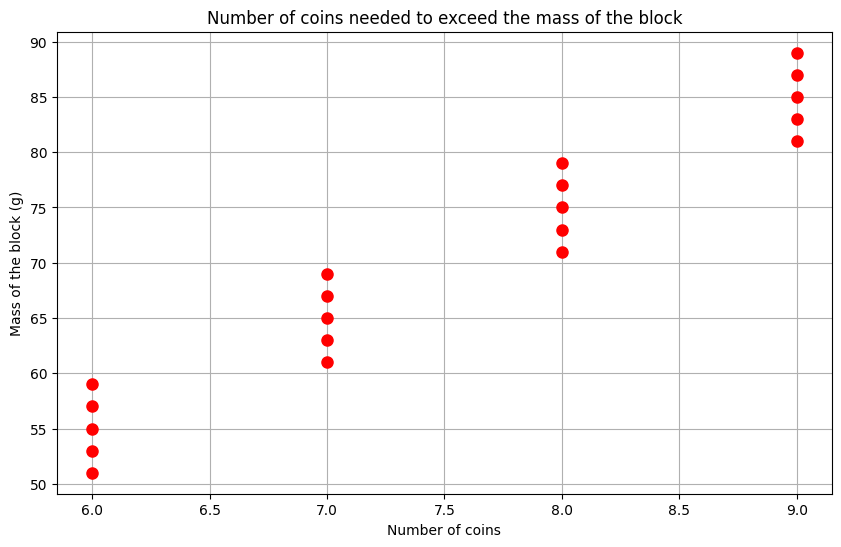

In [4]:
# Step 3: Show the possible outcomes (hozizontal axis) for block masses between 50 and 90 g (vertical axis)

m_block = np.arange(51, 90, 2)  # odd block masses from 51 to 89 g
m_coin = 10  # mass of the coin in grams
coin_possibilities = [number_of_coins(m, m_coin) for m in m_block]

# Make a plot
plt.figure(figsize=(10, 6))
plt.plot(coin_possibilities, m_block, 'ro', markersize=8)
plt.title("Number of coins needed to exceed the mass of the block")
plt.xlabel("Number of coins")
plt.ylabel("Mass of the block (g)")
plt.grid()
plt.show()


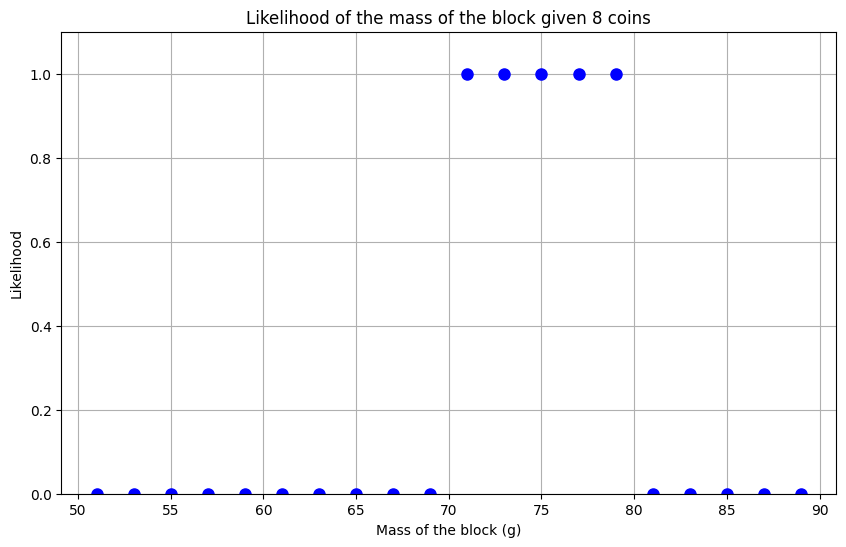

In [5]:
# Step 4: Define a likelihood function for the mass of the block

def likelihood_function(m_block, data):
    """
    Calculate the likelihood of the data given the mass of the block.

    Parameters:
    m_block (int): Mass of the block in grams.
    data (int): Number of coins used..

    Returns:
    float: Likelihood of the data given the mass of the block.
    """
    # Assuming a simple model where the likelihood is 1 if the number of coins matches
    # and 0 otherwise. This is a simplification for demonstration purposes.
    return 1.0 if data == number_of_coins(m_block, 10) else 0.0

# Plot the likelihood function for a measurement of 8 coins

data = 8  # number of coins that exceeded the mass of the block
m_block_range = np.arange(51, 90, 2)  # odd block masses from 51 to 89 g
m_blocks = []
likelihoods = []
for m_block in m_block_range:
    likelihood = likelihood_function(m_block, data)
    m_blocks.append(m_block)
    likelihoods.append(likelihood)

# Make a plot
plt.figure(figsize=(10, 6))
plt.plot(m_blocks, likelihoods, 'bo', markersize=8)
plt.title("Likelihood of the mass of the block given 8 coins")
plt.xlabel("Mass of the block (g)")
plt.ylabel("Likelihood")
plt.grid()
plt.ylim(0, max(likelihoods) * 1.1)
plt.show()

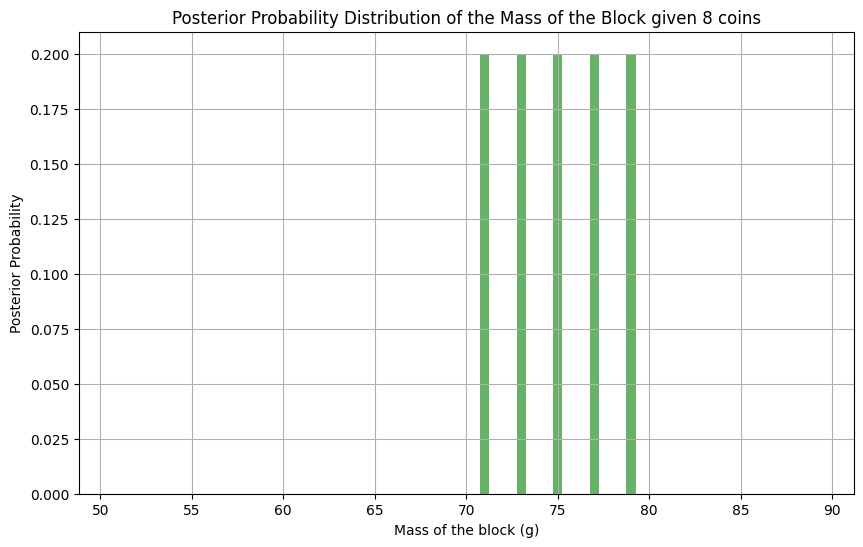

In [9]:
# Step 5: Define the posterior probability distribution for the mass of the block
# -> refer to the posterior_probability.ipynb notebook for an explanation of posterior probability
# Question: What is the prior probability distribution for the mass of the block? There is only one block! What does it even mean to have a prior probability distribution for the mass of the block?

def posterior_distribution(m_block_range, data):
    """
    Calculate the posterior distribution for the mass of the block.

    Parameters:
    m_block_range (array): Range of possible values for the mass of the block.
    data (int): Number of coins that exceeded the mass of the block.

    Returns:
    array: Posterior probabilities for each value in m_block_range.
    """
    likelihoods = [likelihood_function(m, data) for m in m_block_range]
    posterior = likelihoods / np.sum(likelihoods)  # Normalize to get probabilities
    return posterior

# Plot the posterior probability distribution for the mass of the block for a measurement of 8 coins
data = 8
posterior = posterior_distribution(m_block_range, data)
plt.figure(figsize=(10, 6))
# Make a bar plot of the posterior probabilities
plt.bar(m_blocks, posterior, width=0.5, color='green', alpha=0.6, label='Posterior Probability')
plt.title("Posterior Probability Distribution of the Mass of the Block given 8 coins")
plt.xlabel("Mass of the block (g)")
plt.ylabel("Posterior Probability")
plt.grid()
#plt.ylim(0, max(posterior) * 1.1)
plt.show()


In [ ]:
# Step 6: is there a point estimate for the mass of the block?

In [ ]:
# Step 7: Comment on possible confidence intervals that can be reported for the mass of the block if 8 coins were needed to exceed the mass of the block.

In [ ]:
# Step 8: Comment on possible credible intervals that can be reported for the mass of the block if 8 coins were needed to exceed the mass of the block.
